# Stock Market Analysis

![](https://images.unsplash.com/photo-1624996379697-f01d168b1a52?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2940&q=80)

In [1]:
# Team members:

full_name_1 = "Faiz Adem"
full_name_2 = "Anthony Lopardo"
full_name_3 = "Harmony Prado"
full_name_4 = ""

In [2]:
!pip install yfinance
!pip install quandl
!pip install plotly
!pip install pandas-datareader
!pip install yahoo_fin


In [3]:
%matplotlib inline

import yfinance as yf  
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 
import json
import numpy as np
from sklearn.linear_model import LinearRegression
import quandl
import requests
from bs4 import BeautifulSoup
import datetime as dt
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'



---
### Points distribution:

* Parts A1 to A4, 3 points each.
* Part A5, 8 points.
* Part B1, 40 points.
* Part B2, 40 points.


---
### yfinance library

For part A you will use **yfinance** library. **yfinance** is a simple solution for downloading data from yahoo finance website. The returned results are in Pandas data frame format. For more information on **yfinance** library go to https://pypi.org/project/yfinance/.

**Hint:** the only method you need for solving the problems is as follows. This method will get the ticker name, start date, end date, and it will return price as a pandas dataframe.


In [4]:
ticker = 'TSLA'
s_date = '2020-11-05'
e_date = '2020-11-12'

df = yf.download(ticker, s_date, e_date,progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-05,142.766663,146.666672,141.333328,146.029999,146.029999,85243500
2020-11-06,145.366669,145.523331,141.426666,143.316666,143.316666,65118000
2020-11-09,146.500000,150.833328,140.333328,140.419998,140.419998,104499000
2020-11-10,140.029999,140.029999,132.009995,136.786667,136.786667,90852600
2020-11-11,138.816666,139.566666,136.860001,139.043335,139.043335,52073100


---
## Part A1 - Get price: 

Write a function that takes a ticker, start date, optional end date, and optional price type **(Open, High, Low, Close, Adj Close, or Volume)**. If the user does not pass the end date, the function should return the price only for the given start date, ticker, and price type. If the user passes the end date, the function should return a list of closing prices. The default price type is "Close".

Sample result:
    
    [In]: get_stock_price('MSFT', '2019-02-06', '2019-02-13', price_type='Open')
    [Out]: [XXX.XX, XXX.XX, XXX.XX, XXX.XX]
    
    [In]: get_stock_price('MSFT', '2019-02-06', price_type='Open')
    [Out]: XXX.XX
    
    [In]: get_stock_price('MSFT', '2019-02-06', price_type='Adj Close')
    [Out]: XXX.XX
    
    [In]: get_stock_price('MSFT', '2019-02-06')
    [Out]: XXX.XX

In [5]:



def get_stock_price(ticker,s_date, e_date = '' ,price_type = ''):
  df1 = yf.download(ticker, s_date, e_date, progress=False)

  if(s_date != None and e_date != None and price_type == None):
    return df1.loc[s_date:e_date, 'Close']
  elif(s_date != None and e_date == None and price_type == None):
    return df1.loc[s_date, 'Close']
  elif(s_date != None and e_date != None and price_type != None):
    return df1.loc[s_date:e_date, price_type]
  else: 
    return df1.loc[s_date, price_type]

  
  #if e_date in df1:
  #  return df1.loc[s_date:e_date, 'Close']
  #else: 
  #  return df1.loc[s_date, price_type]

  #Open, High, Low, Close, Adj Close, or Volume  
    

In [6]:
get_stock_price('MSFT', '2019-02-06', e_date = '2019-2-13', price_type = 'Adj Close')

Date
2019-02-06    101.578568
2019-02-07    100.850456
2019-02-08    101.233673
2019-02-11    100.831314
2019-02-12    102.402451
Name: Adj Close, dtype: float64

---
## Part A2 - Get stock return:

Write a function that takes a ticker, start date, and end data. The function should return the stock simple return value. Use **adjusted close price** for calculation. 


$$r = \frac{p_{d2} - p_{d1}}{p_{d1}}$$

Where:

    r is simple return 
    p of t1 is price at date d1
    p of t2 is price at date d2
    
Sample result:

    [In]: get_stock_return('MSFT', '2018-01-05', '2018-12-28')
    [Out]: XXX.XX

In [7]:
def get_stock_return(ticker,s_date,e_date):
  stock_return = yf.download(ticker,s_date,e_date,progress=False)

  start_acp = stock_return.iloc[0]['Adj Close']
  end_acp = stock_return.iloc[-1]['Adj Close']  

  simple_return = (end_acp - start_acp) / start_acp

  return round(simple_return,3) 

In [8]:
print(get_stock_return('MSFT', '2018-01-05', '2018-12-28'))

0.167


---
## Part A3 - Get portfolio value: 

Write a function that takes a list of tickers, a list of ticker quantities, and a date. The function should return the total value of the portfolio for a given date.

For example:

    ['V', 'F'], [10, 20] -> 10 V shares,  20 F shares.

Sample result:

    [In]: get_portfolio_value(['V', 'F'], [10, 20] , '2020-11-05')
    [Out]: XXX.XX

In [9]:
def get_portfolio_value(lst_tickers,lst_quantity, date):
  total_value = 0

  for i in range(len(lst_tickers)):
    df = yf.download(lst_tickers[i],date,progress=False)
    total_value += (df.iloc[0][4] * lst_quantity[i])
  
  return round(total_value,2)


In [10]:
get_portfolio_value(['V', 'F'], [10, 20] , '2020-11-05')


2100.63

In [11]:
print(get_stock_return(['V','F'], '2020-11-05', '2020-11-05'))


2 Failed downloads:
- V: No data found for this date range, symbol may be delisted
- F: No data found for this date range, symbol may be delisted


IndexError: single positional indexer is out-of-bounds

---
## Part A4 - Get portfolio return: 

Write a function that takes a list of tickers, a list of ticker quantities, start date, and end date. The function should return the overall simple return on the portfolio.

Sample result:

    [In]: get_portfolio_return(['FB', 'MSFT', 'F'], [3, 5, 20], '2019-10-1', '2019-10-10')
    [Out]: XXX.XX
    

In [12]:
#from os import lstat #Add try and except to avoid issues for stocks delist i.e FB
def get_portfolio_return(lst_tickers,lst_quantities,s_date,e_date):
    initial_value = 0
    current_value = 0
    try:
      for i in range(len(lst_tickers)):
        df_s = yf.download(lst_tickers[i],s_date,progress=False)
        initial_value += (df_s.iloc[0][4] * lst_quantities[i])

      for i in range(len(lst_tickers)):

        df_s = yf.download(lst_tickers[i],s_date,progress=False)
        current_value += (df_s.iloc[-1][4] * lst_quantities[i])

      simple_return = (current_value - initial_value) / initial_value

      return round(simple_return,3)
    except:
      print('This stock at index at', i,'is not availale')
  

In [13]:
get_portfolio_return(['FB', 'MSFT', 'F'], [3, 5, 20], '2019-10-1', '2019-10-10')

Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}

1 Failed download:
- FB: No data found for this date range, symbol may be delisted
This stock at index at 0 is not availale


In [14]:
#def get_portfolio_return(lst_ticker,s_date,e_date):
 # [takes a list of tickers], [quantities], start_date, end_date)   
 df4 = yf.download(lst_ticker[i],date,progress=False)
 df[returns]= (df[price_t])/df[]

simple_return = (current_value - initial_value) / initital_value

IndentationError: unexpected indent (1222685669.py, line 3)

In [15]:
get_portfolio_return(['FB', 'MSFT', 'F'], [3, 5, 20], '2019-10-1', '2019-10-10')

Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}

1 Failed download:
- FB: No data found for this date range, symbol may be delisted
This stock at index at 0 is not availale


---
## Part A5 - Beta value: 

**Beta** is a measure used in the fundamental analysis to determine the volatility of an asset or portfolio in relation to the overall market. To calculate the beta of a security, the covariance between the return of the security and the return of market must be known, as well as the variance of the market returns. 

$$\beta = \frac{Cov(r_p, r_b)}{Var(r_b)}$$

**SPY** is an index fund that is based on the S&P 500 Index. Each share of the traditional SPDR ETFs holds a stake in the 500 stocks represented by the S&P 500. Let's assume that **SPY** is representing the market for calculating the beta.

* If beta is less than one, the stock is less volatile than the market as a whole.
* If beta is greater than one, the stock is more volatile than the market as a whole.
* If beta is less than zero, the stock is losing money while the market as whole is gaining.


Go to https://www.investopedia.com/articles/financial-theory/09/calculating-beta.asp and https://www.youtube.com/watch?v=zlClflcSrM8 for information on **How to Calculate Beta**. 

Source: Investopedia  


Write a Python function that takes ticker, start date, and end date. The function should return the beta for a given stock. 

In [16]:
def beta(ticker, start_date, end_date):

  #Calculating Beta
    #Convert Prices to % change = $today - $yesterday / $today
    #SPY represents Market
    #Beta = ((COVARIANCE of % Change SPY & % Change MSFT) / VAR of SPY % Change )

    symbol = [ticker, 'SPY']
    df = yf.download(symbol, start_date, end_date)['Adj Close']

    log_returns = np.log(df/df.shift())

    cov = log_returns.cov()
    var = log_returns['SPY'].var()

    beta = cov.loc[ticker, 'SPY']/var

    return beta



In [17]:
beta('MSFT', '2016-12-1', '2022-1-1')

[*********************100%***********************]  2 of 2 completed


1.2095508123724106

---
## Part B1 - Stock Analysis: 

Write a Python statement that can generate a comprehensive report for a given stock. You can use any python library for this part, and you must use at least one new library that we have not covered in class. The visualization libraries, yfinance, NumPy, and web scraping are not considered new libraries. The new library should help you with your analysis.

The report may generate the following information:

* The current stock price.
* The current market cap.
* Measures such as EPS, PE Ratio, etc.
* At least 3 informative graphs.
* Company Profile.
* Any other relative information, such as news about the company.

Be creative and try to collect as much data as you can. Test your code for AAPL, TSLA, and TWTR stocks.


In [18]:
def newsupdate(ticker):
    url = 'https://www.nasdaq.com/market-activity/stocks/'+ticker+'/news-headlines'
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')
    
    news = soup.find_all('h1', attrs={'class' : "quote-subdetail__title"}).text
    print(color.BOLD +'Current News:'+color.END,news)

In [19]:
def company_profile(ticker):
  class color:
    END = '\033[0m'
    BOLD = '\033[1m'  
  print('Company Profile For',ticker.upper())
  #Send HTTP requests to retrieve data and parse HTML
  try:
    url = 'https://www.marketwatch.com/investing/stock/'+ ticker +'/company-profile'
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')

    #Company Name
    company_name = soup.find_all('h4', attrs={'class' : 'heading'})[0].text
    print(color.BOLD +'Company Name:'+ color.END,company_name)
    #Address
    address = soup.find_all('div', attrs={'class' : 'address'})[0].text.replace('\n',' ')
    print(color.BOLD +'Address:'+color.END,address)
    #Phone Number
    phone_number = soup.find_all('div', attrs={'class' : 'phone'})[0].text.replace('\n',' ')
    print(color.BOLD +'Phone #:'+color.END,phone_number)
    #Industry
    industry = soup.find_all('li', attrs={'class' : 'kv__item w100'})[0].text.replace('\n','').replace('Industry','')
    print(color.BOLD +'Industry:'+color.END,industry)
    #Sector
    sector = soup.find_all('li', attrs={'class' : 'kv__item w100'})[1].text.replace('\n',' ').replace('Sector',' ')
    print(color.BOLD +'Sector:'+color.END,sector)
    #Fiscal Year
    fiscal_year = soup.find_all('li', attrs={'class' : "kv__item"})[2].text.replace('\n','').replace('Fiscal Year-end','')
    print(color.BOLD +'Fiscal Year-end:'+color.END,fiscal_year)
  #Revenue 
    revenue = soup.find_all('li', attrs={'class' : "kv__item"})[3].text.replace('Revenue',' ').replace('\n',' ')
    print(color.BOLD +'Revenue:'+color.END,revenue)
    #Net Income
    net_income = soup.find_all('li', attrs={'class' : "kv__item"})[4].text.replace('Net Income','').replace('\n','')
    print(color.BOLD +'Net Income:'+color.END,net_income)
    #Sales Growth
    sales_growth = soup.find_all('li', attrs={'class' : "kv__item"})[5].text.replace('2021 Sales Growth','').replace('\n','')
    print(color.BOLD +'Sales Growth:'+color.END,sales_growth)
    #Employees
    employees = soup.find_all('li', attrs={'class' : "kv__item"})[6].text.replace('Employees','').replace('\n','')
    print(color.BOLD +'Employees:'+ color.END,employees)
  except:
    print('Stock Information is not available')


In [20]:
def companyProfile(ticker):
    
    class color:
        END = '\033[0m'
        BOLD = '\033[1m'
    
    print('----------',color.BOLD +'Company Profile for'+color.END,ticker.upper(),'----------')
    url = 'https://money.cnn.com/quote/profile/profile.html?symb='+ticker
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')

    #Name
    name = soup.find_all('title')[0].text
    name = soup.find_all('h1', attrs={'style' : "margin-top:6px;"})[0].text.replace('(NASDAQ:'+ticker,'').replace(')','')
    print(color.BOLD +'Name:'+color.END,name)

    #Address
    address = soup.find_all('div', attrs={'class' : "wsod_bold"})[0].next.next.text
    print(color.BOLD +'Address:'+color.END,address)
    
    #Phone Number
    phone_num = soup.find_all('span',attrs={'class' : "wsod_companyPhonePrefix"})[0].next.next.text
    print(color.BOLD +'Phone Number:'+color.END,phone_num)

    #Sector
    sector = soup.find_all('td', attrs={'class' : "wsod_tdFirst"})[0].text.replace('SECTOR','')
    print(color.BOLD +'Sector:'+color.END,sector)
    
    #Industry
    industry = soup.find_all('td', attrs={'class' : "wsod_tdFirst"})[0].next.next.next.next.text.replace('INDUSTRY','')
    print(color.BOLD +'Industry:'+color.END,industry)
    
    #Market Cap
    market_cap = soup.find_all('td', attrs={'class' : "wsod_tdLast"})[0].text.replace('MARKET CAP','')
    print(color.BOLD +'Market Cap:'+color.END,market_cap)
    
    #CEO
    CEO_name = soup.find_all('td', attrs={'class' : "wsod_officerName"})[0].text.replace('MARKET CAP','')
    print(color.BOLD +'CEO Name:'+color.END,CEO_name)

    #Website
    website = soup.find_all('span',attrs={'class' : "wsod_companyPhonePrefix"})[0].next.next.next.next.next.next.next.next.text
    print(color.BOLD +'Website:'+color.END,website)
    
    #Shareholders
    mutual_fund_holders = soup.find_all('td',attrs={'class' : "wsod_quoteDataPoint"})[0].next.text
    print(color.BOLD +'Mutual fund holders:'+color.END,mutual_fund_holders)
    
    individual_shareholders = soup.find_all('td',attrs={'class' : "wsod_quoteDataPoint"})[1].next.next.next.next.next.text
    print(color.BOLD +'Individual stakeholders:'+color.END,individual_shareholders)
    
    print('-'* 50)
    
    #Company Description
    company_overview = soup.find_all('div', attrs={'id' : "wsod_companyDescription"})[0].text.replace('MARKET CAP','')
    print(color.BOLD +'Overview:'+color.END,company_overview)



In [21]:
companyProfile('AAPL')

---------- Company Profile for AAPL ----------
Name: Apple Inc 
Address: One Apple Park Way
Phone Number: (408) 996-1010
Sector: Electronic Technology
Industry: Telecommunications Equipment
Market Cap: $2.4T
CEO Name: Tim Cook
Website: www.apple.com
Mutual fund holders: 30.54%
Individual stakeholders: 0.35%
--------------------------------------------------
Overview: Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac

In [22]:
company_profile('AAPL')

Company Profile For AAPL
Company Name: Apple Inc.
Address:  One Apple Park Way Cupertino, California 95014-2083  
Phone #:  Phone 1 408 996-1010 
Industry: Computers/Consumer Electronics
Sector:    Technology 
Fiscal Year-end: 01/0002
Revenue:    $394.33B 
Net Income: $99.8B
Sales Growth: 2022 Sales GrowthN/A
Employees: N/A


In [23]:
def key_statistics(ticker):
  ticker = yf.Ticker(ticker)


  key_stats = [
      [ticker.info['currentPrice']],
      [ticker.info['marketCap']], 
      [ticker.info['trailingEps']],
      [ticker.info['forwardEps']],
      [ticker.info['currentRatio']],
      [ticker.info['quickRatio']]
      ]

  stats= pd.DataFrame(key_stats)
  #switch columns in df
  final_stats = stats.T

  #rename indexes
  final_stats.index = [ticker]
  #rename columns 
  final_stats.columns = ['Current Price', 'Market Cap','Trailing EPS', 'Forward EPS', 'Current Ratio', 'Quick Ratio']
  return final_stats 


key_statistics('AAPL')

,Current Price,Market Cap,Trailing EPS,Forward EPS,Current Ratio,Quick Ratio
yfinance.Ticker object <AAPL>,144.22,2.294266e+12,6.11,6.81,0.879,0.709


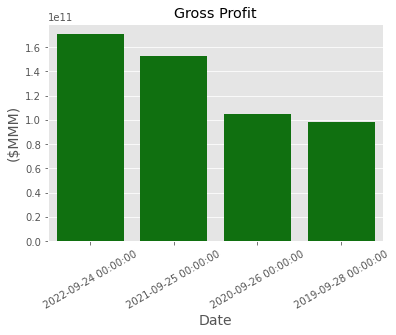

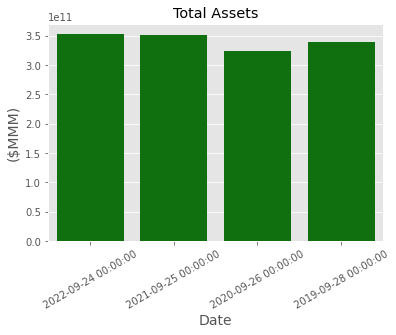

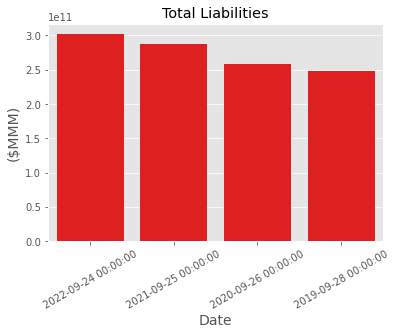

In [24]:
import yahoo_fin.stock_info as yf

def key_graphs(ticker):

  inc_s = yf.get_income_statement(ticker)
  bal_s = yf.get_balance_sheet(ticker)

  #create pds from yf.get_finance
  is_df = pd.DataFrame(inc_s)
  bal_df = pd.DataFrame(bal_s)

  #key graph: Gross Profit
  sns.barplot(data=is_df.iloc[[6]],color='green').set(title='Gross Profit')

  plt.xlabel("Date", size = 14)
  plt.ylabel("($MMM)", size = 14)
  plt.xticks(rotation=30)
  plt.show()


  #Total Asset Graph 
  sns.barplot(data=bal_df.iloc[[3]],color='green').set(title='Total Assets')
  plt.xlabel("Date", size = 14)
  plt.ylabel('($MMM)', size = 14)
  plt.xticks(rotation=30)
  plt.show()

  #Total Liabilities Graph 
  sns.barplot(data=bal_df.iloc[[0]],color='red').set(title='Total Liabilities')
  plt.xlabel("Date", size = 14)
  plt.ylabel("($MMM)", size = 14)
  plt.xticks(rotation=30)
  plt.show()


key_graphs('AAPL')






In [33]:
def create_stock_chart(ticker, s_date, e_date, progress=False):
    df = yf.download(ticker, s_date, e_date, progress=False)
    df['Moving Average 50'] = df['Close'].rolling(50).mean()
    df['Moving Average 200'] = df['Close'].rolling(200).mean()
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                vertical_spacing=0.10, subplot_titles=(ticker, 'Volume'), 
                row_width=[0.2, 0.8])
    fig.add_trace(go.Candlestick(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"], name="Open-High-Low-Close"), row=1, col=1)

    fig.add_trace(go.Scatter(x=df.index, y=df["Moving Average 50"], marker_color='black',name="MA50"), row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df["Moving Average 200"], marker_color='grey',name="MA200"), row=1, col=1)
    fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='orange', showlegend=False, name='Volume'), row=2, col=1)

    fig.update_layout(
        font_family='Verdana',
        title= ticker + ' ' + 'Historical Stock Chart',
        title_font_color='darkblue',
        title_font_family = 'Times New Roman',
        xaxis_tickfont_size=12,
        yaxis=dict(title='Price',
                    titlefont_size=14,
                    tickfont_size=12
        ),

    )
    fig.update(layout_xaxis_rangeslider_visible=True)
    fig.show(renderer="colab")

create_stock_chart('AAPL', '2018-01-01', '2022-11-25')

AttributeError: module 'yahoo_fin.stock_info' has no attribute 'download'

In [26]:
list_of_tickers = ['AAPL', 'TWTR', 'TSLA']

def comparision_key_statistics(list_of_tickers):
  stock_df = pd.DataFrame()

  for ticker in list_of_tickers:
    stock_info = yf.Ticker(ticker).info
    df = pd.DataFrame([stock_info])
    stock_df = stock_df.append(df)

    key_statsdf = stock_df.iloc[0:3][['symbol','currentPrice','marketCap','enterpriseValue','trailingEps','forwardEps','currentRatio','quickRatio']]
    key_statsdf.columns = ['Symbol','Current Price', 'Market Cap','Enterprise Value','Trailing EPS', 'Forward EPS', 'Current Ratio', 'Quick Ratio']
  return key_statsdf
    

comparision_key_statistics(list_of_tickers)

AttributeError: module 'yahoo_fin.stock_info' has no attribute 'Ticker'

---
## Part B2 - Automated Investment Platform

Develop a Python program that takes **four** tickers and analyzes them. The automated investment platform should pick **one** stock to buy.

* Design an investment strategy and briefly explain your strategy.
* The program should print out a report comparing the stocks.
* The program should pick the stock based on a logical and well-justified strategy. So you cannot randomly select a stock.

You can use any python library for this part. First, develop a strategy for investment; then convert your strategy to a program. You should clearly explain your investment strategy and the required steps for implementation.

# Type you strategy here





In [ ]:
# your strategy goes here

# Use Quandl to get return data
# Take risk tolerance as input, low or high
# Find variance (beta) to determine the stocks level of risk
# Find mean return over the holding period for each stock
# Optimal pick will be the stock with the highest return that falls within the investors chosen risk tolerance level




In [27]:
from numpy.lib.function_base import corrcoef
# Your program goes here

def get_investment(t1, t2, t3, t4, risk):
  
  tickers = [t1,t2,t3,t4]
  return_data = {}
  betas = {}
  high = {}
  low = {}
  stock = {}

  for e in range(len(tickers)):
    # This calculates the Beta
    symbol = [tickers[e], 'SPY']
    df = yf.download(symbol, '2018-01-01', '2022-11-1')['Adj Close']

    log_returns = np.log(df/df.shift())

    cov = log_returns.cov()
    var = log_returns['SPY'].var()

    beta = cov.loc[tickers[e], 'SPY']/var

    betas[tickers[e]] = beta
  #print('\n ', betas)
#return betas

  
    
      for x in range(len(tickers)):
    #This gathers the return data and prints out a simple comparison report
    df3 = yf.download(tickers[x],'2018-01-05', '2018-12-28', progress=False)
    
    s_date_acp = df3.iloc[0]['Adj Close']
    e_date_acp = df3.iloc[-1]['Adj Close']  

    return_data[tickers[x]] = (e_date_acp - s_date_acp) / s_date_acp

  print(' \nThe stocks being considered and their respective returns are:', return_data)
  print('Of these, the stock with the highest return is', str(max(return_data, key = return_data.get)), '\nThe stock with the lowest return is', str(min(return_data, key = return_data.get)))  
  print('  \n****************************************')
  print('The betas of the stocks are:', betas, ' \nThe most volatile stock is', str(max(betas, key = betas.get)), ' \nThe least volatile stock is', str(min(betas, key = betas.get)))
  
  if risk == 'low':
    for key, value in betas.items():
      if value < 1:
        low[key] = return_data[key]
    #return low
    print(' \n', 'The stock with the highest return within the ' + str(risk) + ' risk tolerance level is ' + str(max(low, key = low.get)))
  
  if risk == 'high':
    for key, value in betas.items():
      if value >= 1:
        high[key] = return_data[key]
    #return high
    print(' \n****************************************', '\nThe stock with the highest return within the investors risk tolerance level is ' + str(max(high, key = high.get)))



In [28]:
#Risk tolerance can be 'high' or 'low'
get_investment('MSFT','AAPL','UFCS','GM', 'high')

AttributeError: module 'yahoo_fin.stock_info' has no attribute 'download'